In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (10,5)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [93]:
#Read data
df = pd.read_csv('https://raw.githubusercontent.com/rutikhatim/Assignment/main/delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [94]:
#Correlation analysis

<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

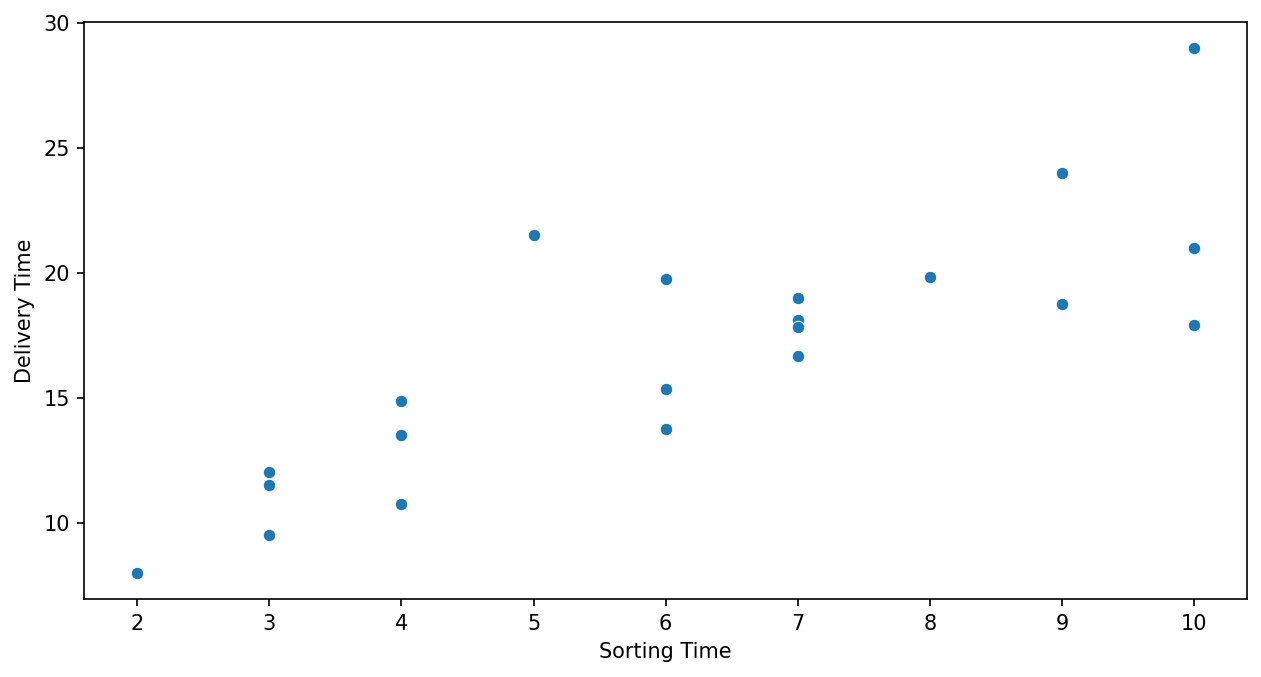

In [95]:
sns.scatterplot(x=df['Sorting Time'],y=df['Delivery Time'])

<Axes: >

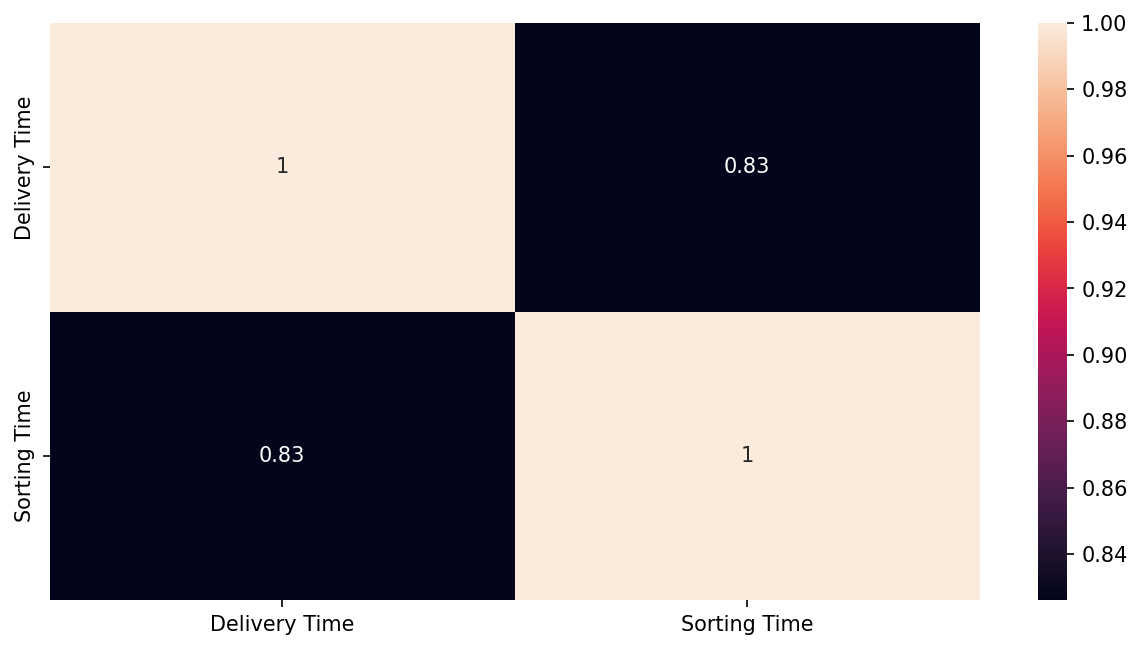

In [96]:
sns.heatmap(df.corr(),annot=True)

In [97]:
#Import statsmodels


In [98]:
df.rename(columns={"Sorting Time":"Sorting_time","Delivery Time":"Delivery_time"},inplace=True)
df

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [99]:
import statsmodels.formula.api as smf

In [100]:
model = smf.ols('Delivery_time~Sorting_time',data=df).fit()
model

In [101]:
#Model parameters
model.params

Intercept       6.582734
Sorting_time    1.649020
dtype: float64

In [102]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           3.98e-06
Time:                        22:08:04   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
#Print p value
model.pvalues

Intercept       0.001147
Sorting_time    0.000004
dtype: float64

In [104]:
#r2 value
model.rsquared, model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

# Prediction for new data

In [105]:
df.head()

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [106]:
x_test = pd.DataFrame({
    'Sorting_time' : [4,8,6.5,4.3,7.1]
    
})
x_test

,Sorting_time
0,4.0
1,8.0
2,6.5
3,4.3
4,7.1


In [107]:
model.predict(x_test)

0    13.178814
1    19.774893
2    17.301363
3    13.673520
4    18.290775
dtype: float64